In [1]:
%%local
%matplotlib inline

In [2]:
import json
import pyspark.sql.functions as F
from pyspark.sql import Row


Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
247,application_1657650108716_0249,pyspark,idle,Link,Link,shirleywu,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
# status code decoding:
# // Event Type
# const (
# 	CONNECTED         StatusEventType = 1 /* AP Connected Successfully */
# 	DISCONNECTED      StatusEventType = 2 /* AP Disconnected from websocket*/
# 	AUTH_FAIL         StatusEventType = 3 /* AP failed to authenticate */
# 	PREAUTH_REPORT    StatusEventType = 4 /* AP failed before it could authenticate. These MUST be treated with suspicion, since anything in them could be forged */
# 	REDIR_IN_PROGRESS StatusEventType = 5 /* Redirect in progress */
# )

# const (
# 	SUCCESSFUL_AUTH StatusEventSubType = 0

# 	NETWORK_DISCONNECT StatusEventSubType = 1 // TCP socket disconnected
# 	FORCED_DISCONNECT  StatusEventSubType = 2 // disconnect ordered by operator

# 	UNAUTH_PING_DOS        StatusEventSubType = 8  // Too many pings while AP is unauthenticated
# 	CONFIG_UNMARSHALL_FAIL StatusEventSubType = 9  // Failed to unmarshall configuration
# 	CONFIG_FETCH_ERROR     StatusEventSubType = 10 // Failed to fetch Config from PAPI
# 	CONFIG_REPLY_ERROR     StatusEventSubType = 11 // Failed to send config to EP
# 	BAD_SLA                StatusEventSubType = 12 // EP asked Bad SLA
# 	UNREASONABLE_SLA       StatusEventSubType = 13
# 	REST_REPLY_FAILURE     StatusEventSubType = 14
# 	GET_RANDOM_FAILURE     StatusEventSubType = 15
# 	GET_TIME_FAILURE       StatusEventSubType = 16
# 	BAD_TELEMETRY_DATA     StatusEventSubType = 17
# 	MANUF_ERROR            StatusEventSubType = 18
# 	REQUEST_SIZE_ERROR     StatusEventSubType = 19
# 	MSG_UNMARSHAL_ERROR    StatusEventSubType = 20
# 	FILE_UPLOAD_ERROR      StatusEventSubType = 21
# 	EP_FILE_ACK_ERROR      StatusEventSubType = 22
# 	FILE_WRITE_FAILURE     StatusEventSubType = 23

# 	INVALID_EP_AUTH         StatusEventSubType = 64
# 	UNSUPPORTED_VERSION     StatusEventSubType = 65
# 	SMALL_QC                StatusEventSubType = 66
# 	UNUSUAL_SIZE            StatusEventSubType = 67
# 	UNUSUAL_CONTENT         StatusEventSubType = 68
# 	NO_CLIENT_COUNTER       StatusEventSubType = 69
# 	ENV_MISMATCH            StatusEventSubType = 70
# 	SECRET_UNAVAILABLE      StatusEventSubType = 71
# 	READ_FAILURE            StatusEventSubType = 72
# 	SEND_FAILURE            StatusEventSubType = 73
# 	EP_AUTH_FAILED          StatusEventSubType = 74
# 	AUTH_REPLY_FAILURE      StatusEventSubType = 75
# 	EP_AUTH_FAIL            StatusEventSubType = 76
# 	UNEXPECTED_STATE        StatusEventSubType = 77
# 	UNEXPECTED_MSG_FROM_EP  StatusEventSubType = 78
# 	EP_IN_DEVELOPER_MODE    StatusEventSubType = 79
# 	UNSUPPORTED_AUTH_TYPE   StatusEventSubType = 80
# 	MISUSE_OF_TEST_EP       StatusEventSubType = 81
# 	MISUSE_OF_TEST_AUTHTYPE StatusEventSubType = 82
# 	UNSUPPORTED_SNI_HOST    StatusEventSubType = 83
# 	MISCONFIGURED_CLOUD_INI StatusEventSubType = 84
# 	BAD_NEW_PROVIDER_INFO   StatusEventSubType = 85
# 	BAD_NEW_ENV_INFO        StatusEventSubType = 86
# 	NEW_ENV_INFO            StatusEventSubType = 87
# 	DEVICE_NOT_CLAIMED      StatusEventSubType = 88

# 	PREAUTH_REPORT_FROM_EP StatusEventSubType = 128 // EP has some sort of pre-authentication issue it wants to report
# )


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
##############
# aggregate data into hourly bucket and only extract connect and disconnect
#############
# for d in range (8, 13):
#     for h in range(0, 24):
#          ep_connect_rdd = sc.sequenceFile('s3://mist-secorapp-production/ep-connect-status/ep-connect-status-production/dt=2022-08-{:02d}/hr={:02d}'\
#                                           .format(d, h))\
#             .map(lambda r: json.loads(r[1]))
     
#         connect_df = ep_connect_rdd.filter(lambda r: 'Terminator' in r and 'LBAddr' in r  and r['Status'] in [1, 2])\
#          .map(lambda r: Row(terminator=r['Terminator'], 
#                                     lb_addr=r['LBAddr'], 
#                                     timestamp=r['Timestamp'][0:19], 
#                                     ap=r['ID'], 
#                                     org_id=r.get('OrgID'), 
#                                     site_id=r.get('SiteID'), 
#                                     status=r['Status']))\
#         .toDF()
    
#          connect_df.repartition(5).write.format('parquet')\
#             .mode('overwrite').save('s3://mist-data-science-dev/shirley/ep-connect-status/dt=2022-08-{:02d}/hr={:02d}'.format(d, h))
        
#         print('done with hour dt=2022-08-{:02d}/hr={:02d}'.format(d, h))
        


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [54]:

connet_df = spark.read.parquet('s3://mist-data-science-dev/shirley/ep-connect-status/dt=2022-08-*/hr=*/')

connet_df.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-------------+-------------------+-----------------+--------------------+--------------------+------+
|      terminator|      lb_addr|          timestamp|               ap|              org_id|             site_id|status|
+----------------+-------------+-------------------+-----------------+--------------------+--------------------+------+
|ip-172-31-50-194| 172.31.51.40|2022-08-11T01:07:36|5c-5b-35-d0-05-c3|096f09aa-c740-4b9...|7501460f-f1b5-41b...|     2|
| ip-172-31-48-88| 172.31.48.62|2022-08-11T01:09:17|5c-5b-35-8f-4c-99|a7cc1161-cb41-4e5...|6ae9aab6-e2ae-4c0...|     2|
| ip-172-31-48-90| 172.31.48.62|2022-08-11T01:10:26|d4-dc-09-19-b7-1b|56de201d-e63b-431...|6dc4aa35-0f78-4f7...|     2|
|ip-172-31-50-249| 172.31.48.62|2022-08-11T01:10:59|ac-23-16-40-92-0e|ba697fbc-8521-443...|89373a06-977b-4a2...|     2|
|ip-172-31-49-113| 172.31.50.88|2022-08-11T01:07:03|d4-20-b0-44-c8-b5|ec66b2e6-7108-494...|cfeaeac2-2eb5-4a9...|     2|
|ip-172-31-49-119|172.31.48.242|2022-08-

In [55]:
connect_hourly_df = connet_df.withColumn('ts', F.to_timestamp(F.col('timestamp'))).withColumn('ts_hour', F.date_format(F.col('ts'), 'yyyy-MM-dd HH')).persist()



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [56]:
hourly_agg_df = connect_hourly_df.groupBy('ts_hour').agg(F.count('org_id').alias('count')).persist()



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
hourly_agg_pdf = hourly_agg_df.orderBy('ts_hour').toPandas()
hourly_agg_pdf

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

           ts_hour   count
0    2022-08-06 00  244474
1    2022-08-06 01  238723
2    2022-08-06 02  236528
3    2022-08-06 03  236457
4    2022-08-06 04  238540
..             ...     ...
163  2022-08-12 19  230170
164  2022-08-12 20  240084
165  2022-08-12 21  241186
166  2022-08-12 22  249546
167  2022-08-12 23  250941

[168 rows x 2 columns]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

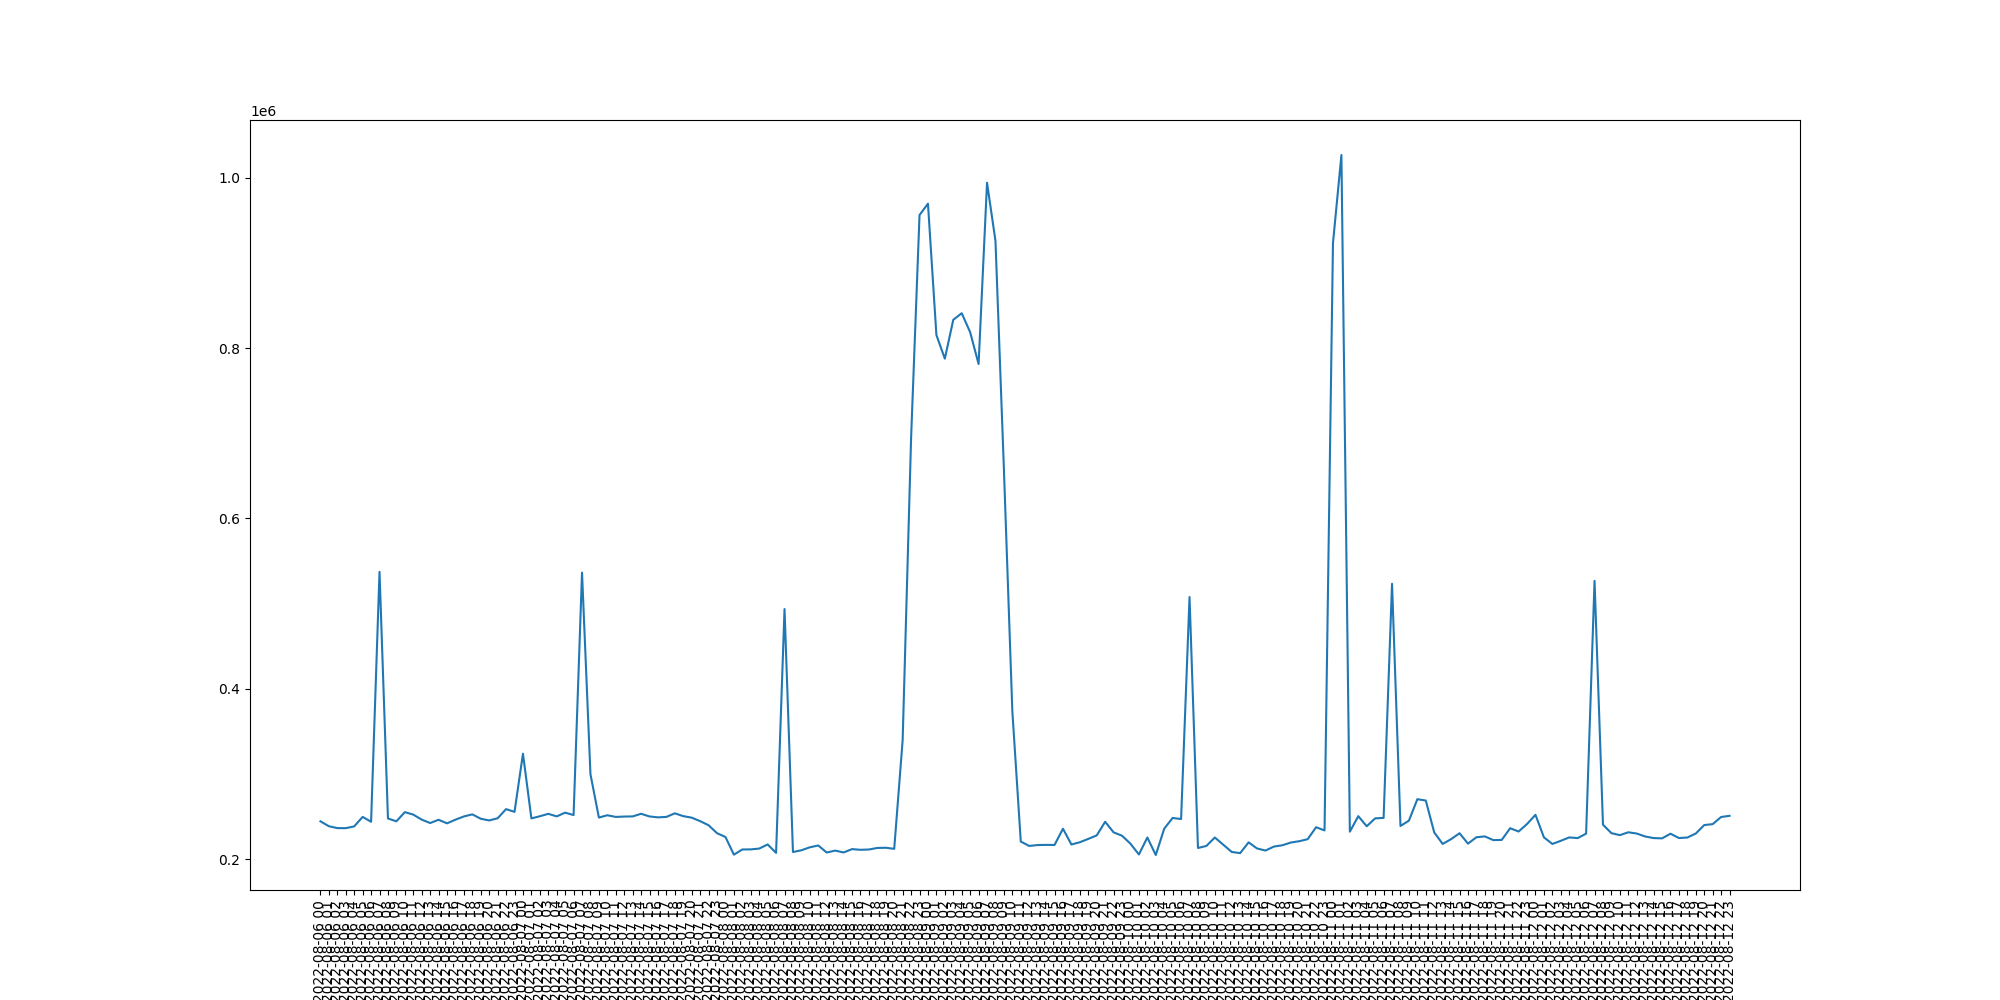

In [58]:

test_df = hourly_agg_pdf.set_index('ts_hour')

import matplotlib.pyplot as plt

plt.grid()
fig = plt.figure(figsize=(20,10))

plt.plot(test_df)
plt.xticks(rotation = 90) 
plt.show()

%matplot plt


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

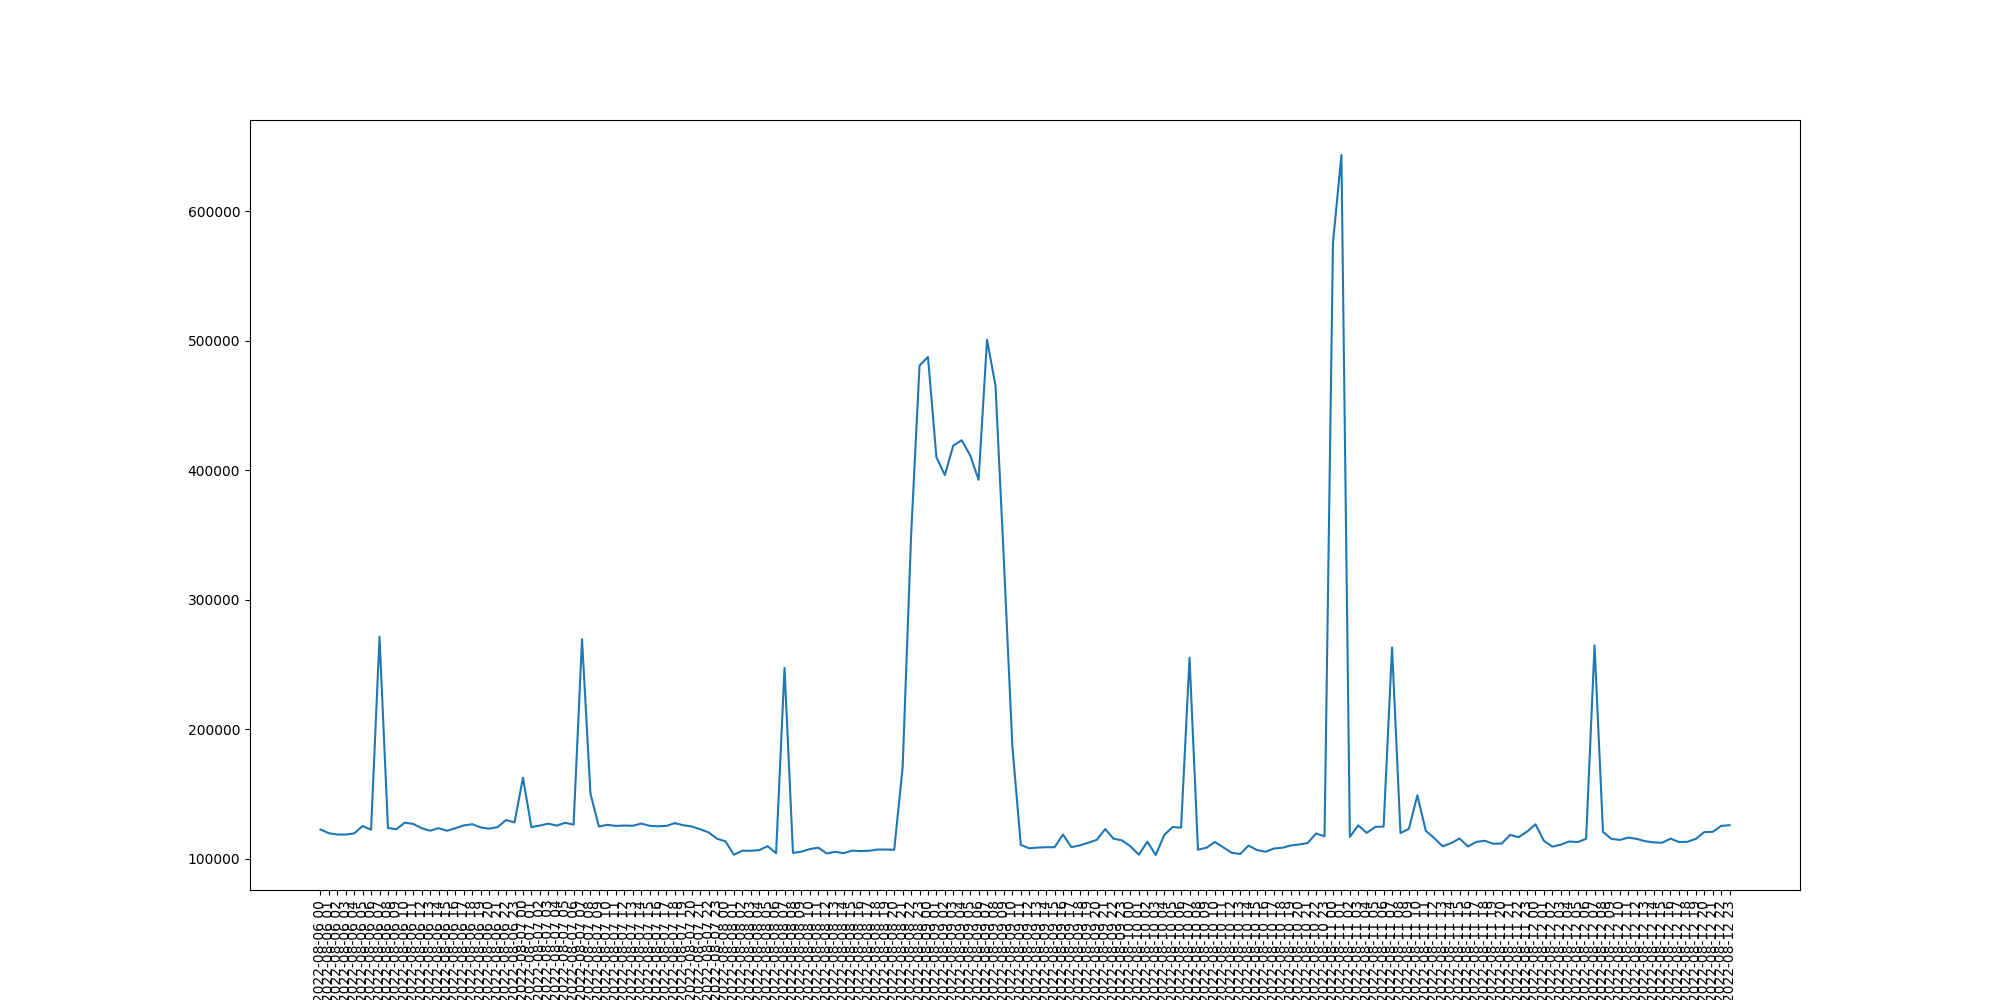

In [59]:
## disconnect events
disconnect_df = connect_hourly_df.filter('status == 2').groupBy('ts_hour').agg(F.count('org_id').alias('count')).persist()

disconnect_pdf = disconnect_df.orderBy('ts_hour').toPandas().set_index('ts_hour')

import matplotlib.pyplot as plt

plt.grid()
fig = plt.figure(figsize=(20,10))

plt.plot(disconnect_pdf)
plt.xticks(rotation = 90) 
plt.show()

%matplot plt


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

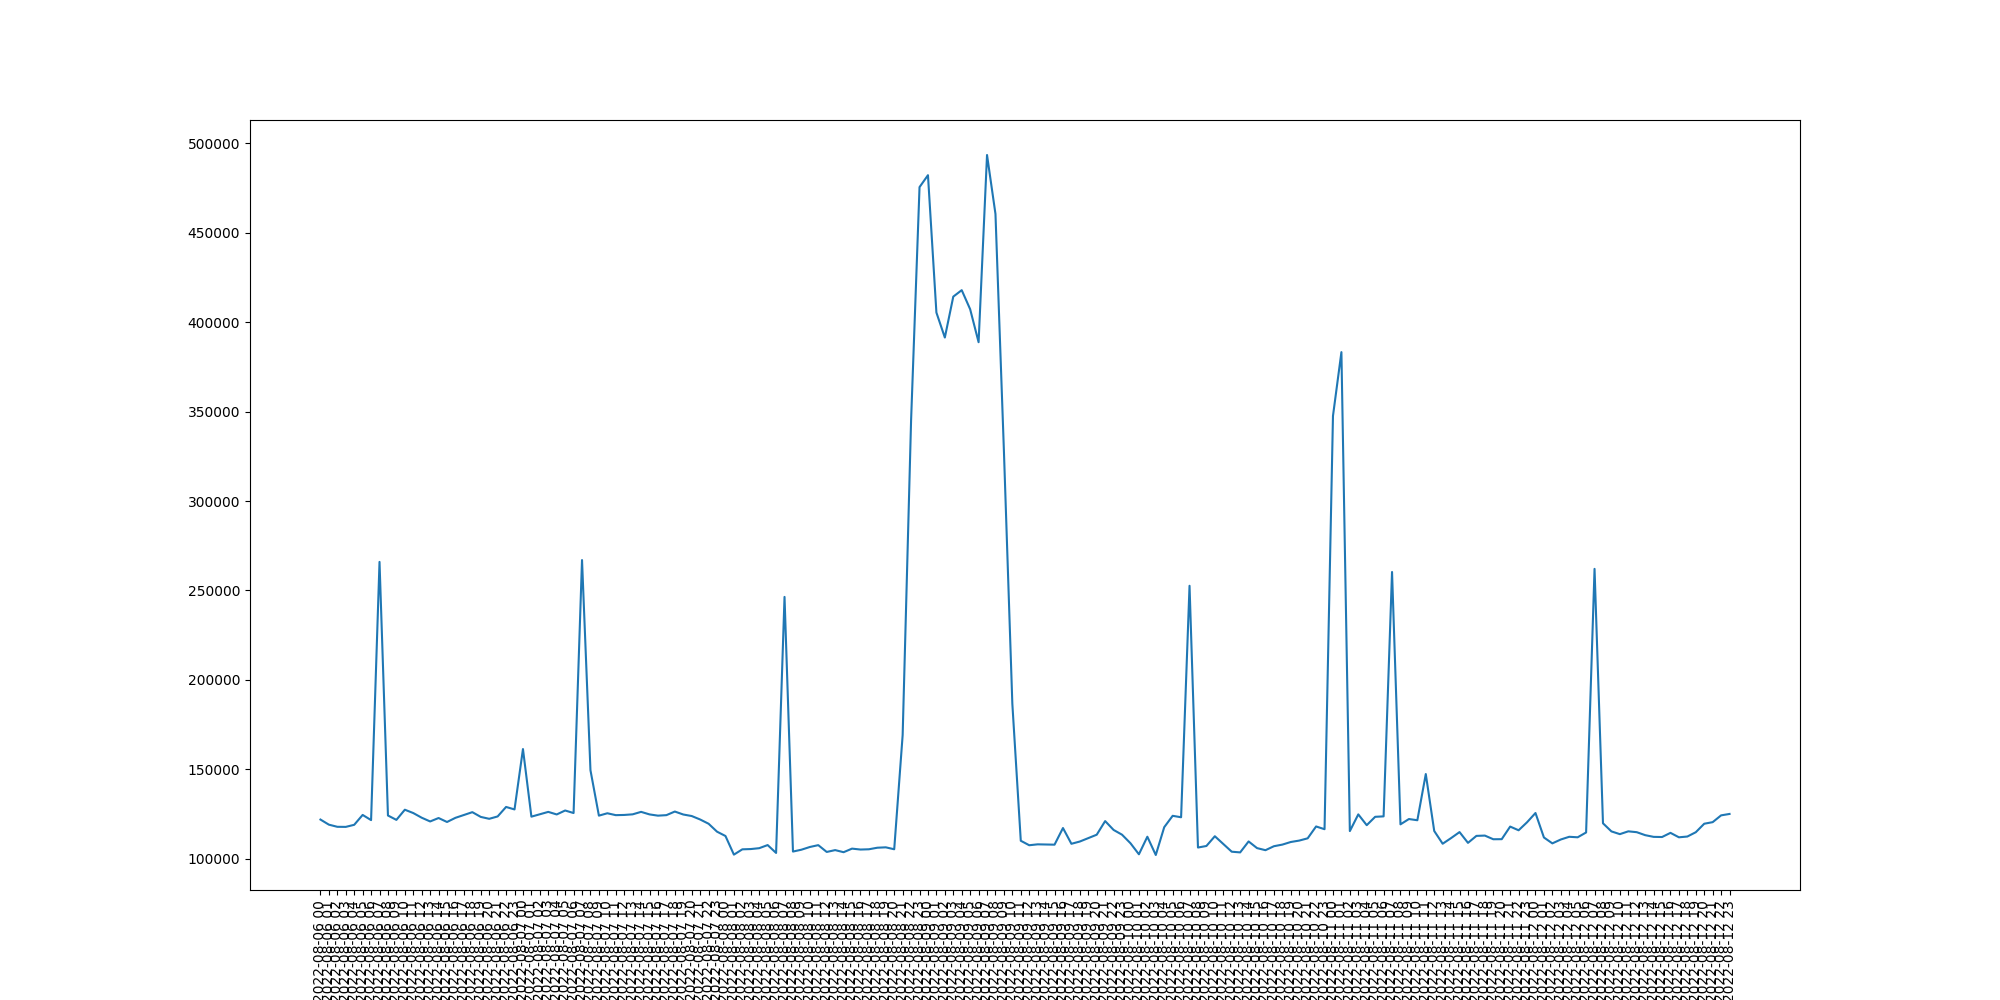

In [60]:
## connect events
connect_df = connect_hourly_df.filter('status == 1').groupBy('ts_hour').agg(F.count('org_id').alias('count')).persist()

connect_pdf = connect_df.orderBy('ts_hour').toPandas().set_index('ts_hour')

import matplotlib.pyplot as plt

plt.grid()
fig = plt.figure(figsize=(20,10))

plt.plot(connect_pdf)
plt.xticks(rotation = 90) 
plt.show()

%matplot plt

In [61]:
# check one of the terminator ip-172-31-49-160
connect_df = connect_hourly_df.groupBy('terminator', 'ts_hour').agg(F.count('org_id').alias('count')).persist()

connect_pdf = connect_df.orderBy('ts_hour').toPandas().set_index('ts_hour')

terminators = connect_pdf.terminator.unique()



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

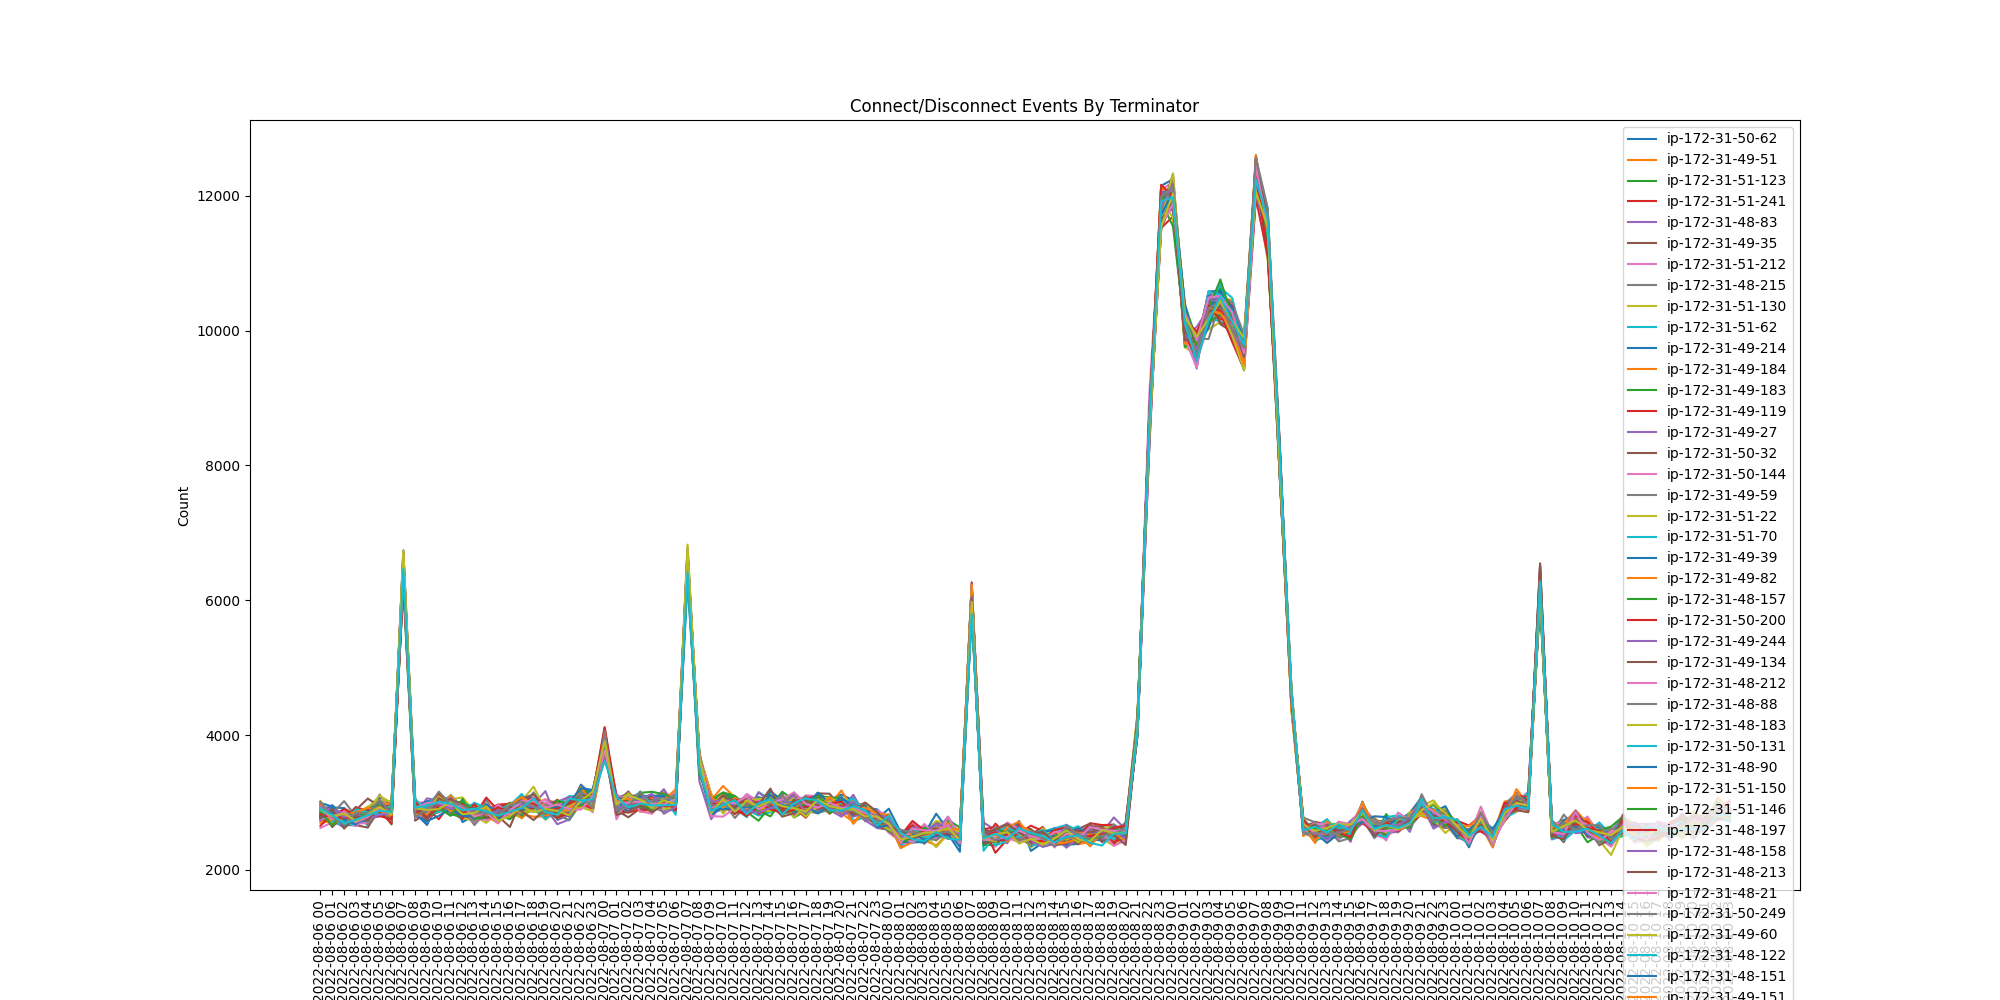

In [71]:
import matplotlib.pyplot as plt
plt.grid()
fig = plt.figure(figsize=(20,10))

for term in terminators:
    if term.startswith('client'):
        continue
        
    sub_df = connect_pdf[connect_pdf.index < '2022-08-11 00'] 
    sub_df = sub_df[sub_df['terminator'] == term]
    plt.plot(sub_df['count'], label=term)

plt.title("Connect/Disconnect Events By Terminator")
plt.xlabel("Date")
plt.ylabel("Count")
 
plt.legend()
plt.xticks(rotation = 90) 
plt.show()



%matplot plt

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

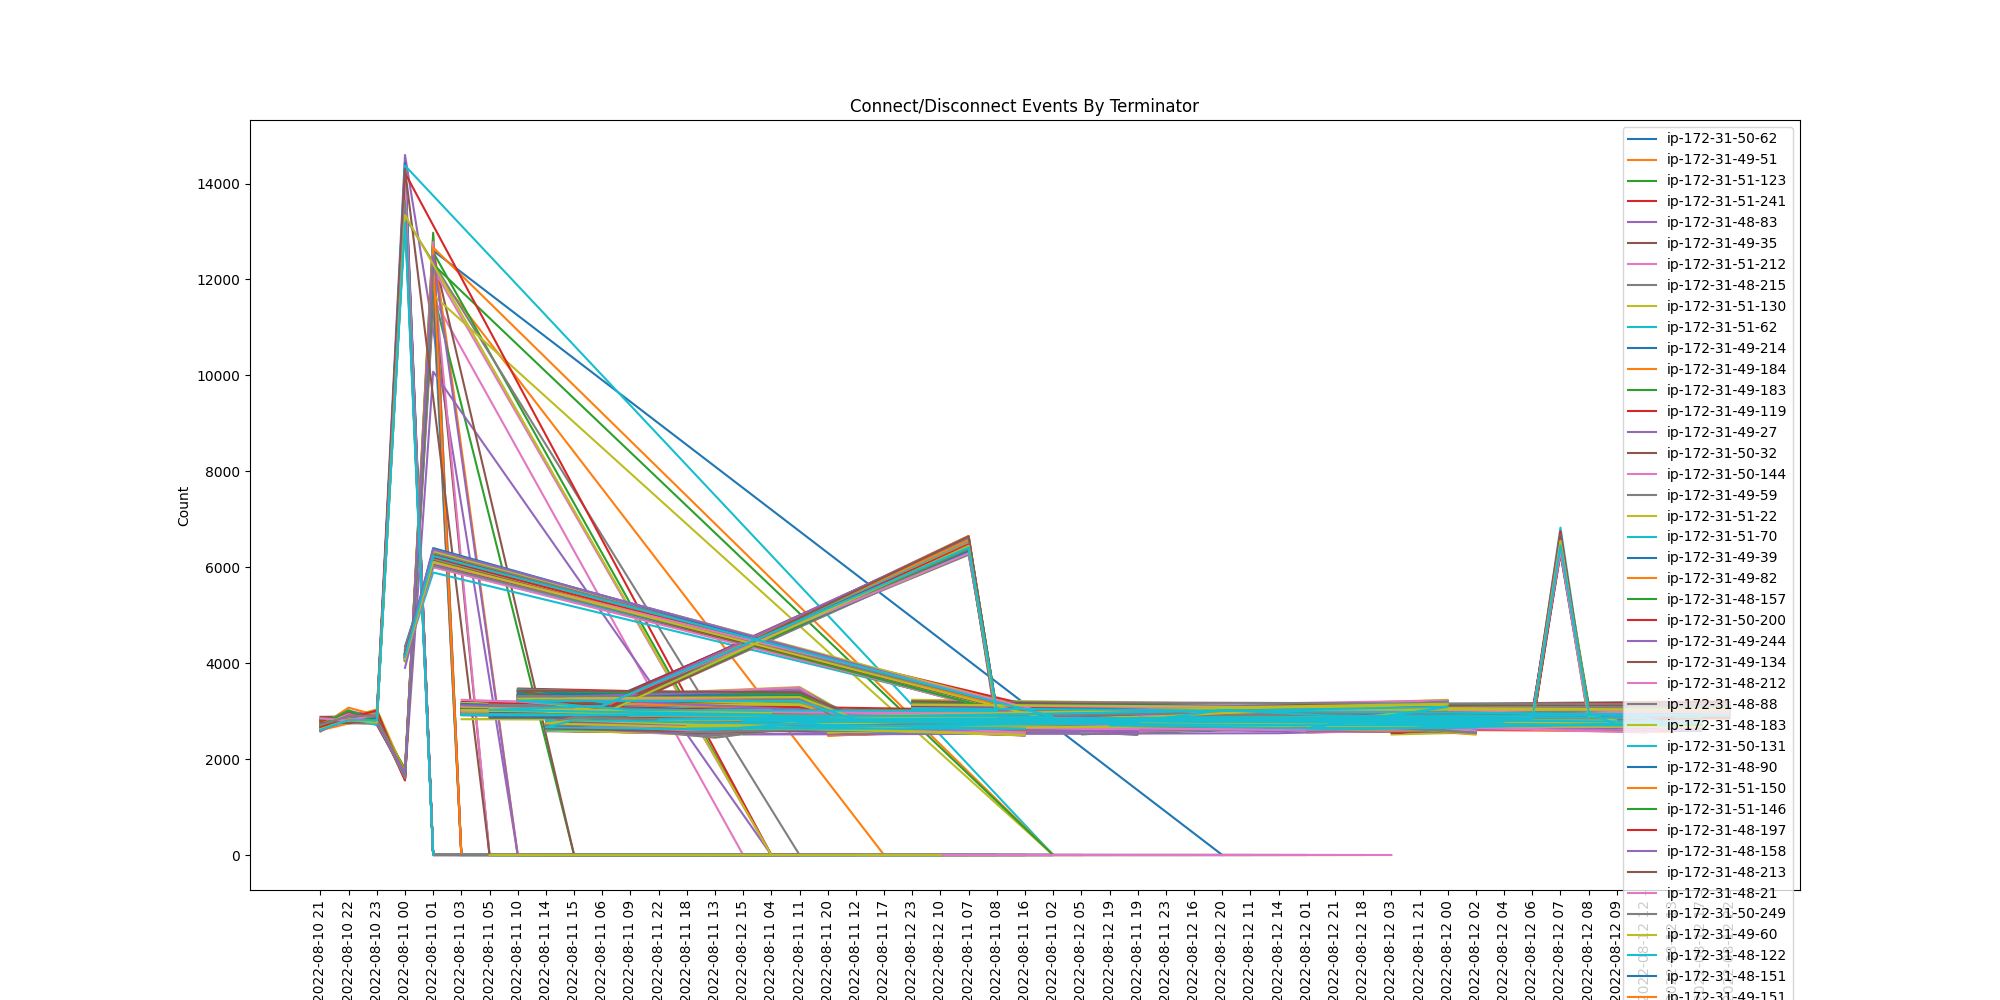

In [72]:
# ep term migration??

import matplotlib.pyplot as plt
plt.grid()
fig = plt.figure(figsize=(20,10))

for term in terminators:
    if term.startswith('client'):
        continue
        
    sub_df = connect_pdf[connect_pdf.index > '2022-08-10 20'] 
    sub_df = sub_df[sub_df['terminator'] == term]
    plt.plot(sub_df['count'], label=term)

plt.title("Connect/Disconnect Events By Terminator")
plt.xlabel("Date")
plt.ylabel("Count")
 
plt.legend()
plt.xticks(rotation = 90) 
plt.show()



%matplot plt

In [74]:
# by load balancer

connect_df = connect_hourly_df.groupBy('lb_addr', 'ts_hour').agg(F.count('org_id').alias('count')).persist()

connect_pdf = connect_df.orderBy('ts_hour').toPandas().set_index('ts_hour')

load_balancers = connect_pdf.lb_addr.unique()



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

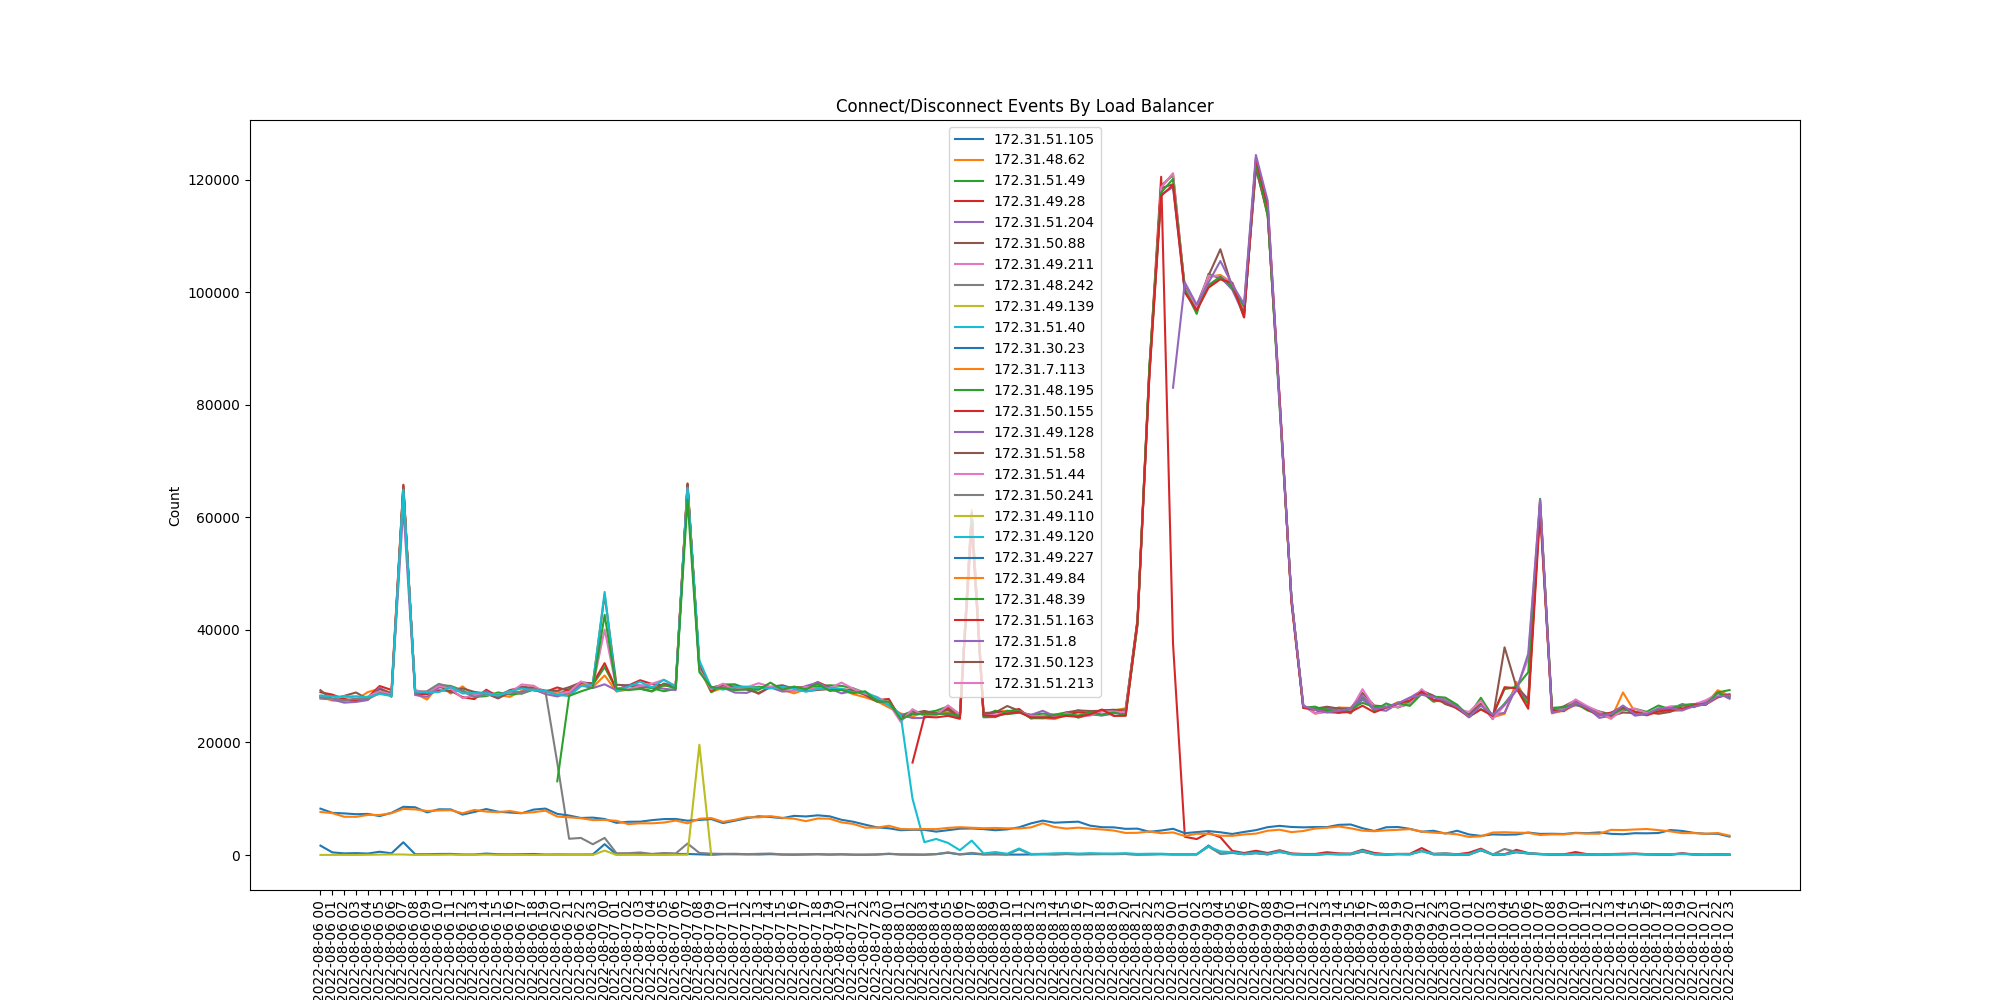

In [80]:
import matplotlib.pyplot as plt
plt.grid()
fig = plt.figure(figsize=(20,10))

for lb in load_balancers:
        
    sub_df = connect_pdf[connect_pdf['lb_addr'] == lb]
    sub_df = sub_df[sub_df.index < '2022-08-11 00'] 
    plt.plot(sub_df['count'], label=lb)

plt.title("Connect/Disconnect Events By Load Balancer")
plt.xlabel("Date")
plt.ylabel("Count")
 
plt.legend()
plt.xticks(rotation = 90) 
plt.show()



%matplot plt

In [78]:
connect_pdf

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                     lb_addr  count
ts_hour                            
2022-08-06 00  172.31.51.105   1675
2022-08-06 00   172.31.48.62  28197
2022-08-06 00   172.31.51.49  28262
2022-08-06 00   172.31.49.28  28925
2022-08-06 00  172.31.51.204  27795
...                      ...    ...
2022-08-12 23   172.31.7.113   3063
2022-08-12 23   172.31.48.39  24908
2022-08-12 23   172.31.49.84  24145
2022-08-12 23   172.31.51.58  24288
2022-08-12 23   172.31.48.62      3

[2287 rows x 2 columns]